<a href="https://colab.research.google.com/github/Keerthanarampa/BreastCancer-detection-using-DL/blob/main/temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
data_dir = "E:\\Final Project\\check2"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np


In [3]:
labels = ['benign','malignant']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append((resized_arr, class_num))  # Using tuple instead of list
            except Exception as e:
                print(e)
    return data


In [4]:
train = get_data('E:\\Final Project\\tempdata\\train')
val = get_data(r"E:\\Final Project\\tempdata\\validation")
test=get_data(r"E:\\Final Project\\check3\\test")

<Axes: xlabel='count'>

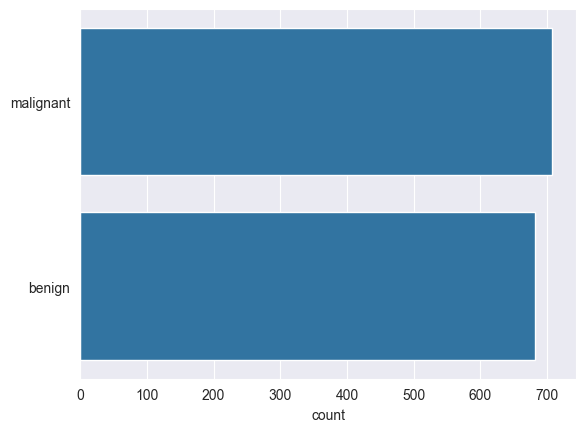

In [5]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("malignant")
    else:
        l.append("benign")
sns.set_style('darkgrid')
sns.countplot(l)

In [6]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test=np.array(x_test)/255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)


In [7]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
print("x_val:",x_val.shape)
print("y_val:",y_val.shape)

x_train: (1390, 224, 224, 3)
y_train: (1390,)
x_test: (412, 224, 224, 3)
y_test: (412,)
x_val: (276, 224, 224, 3)
y_val: (276,)


In [8]:
datagen = ImageDataGenerator(
       featurewise_center=False,
       samplewise_center=False,
       featurewise_std_normalization=False,
       samplewise_std_normalization=False,
       zca_whitening=False,
       rotation_range = 90,
       zoom_range = 0.5,
       width_shift_range=0.2,
       height_shift_range=0.2,
       horizontal_flip = True,

)

datagen.fit(x_train)
datagen.fit(x_val)
datagen.fit(x_test)


In [9]:
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
convlayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers[:-15]:
    layer.trainable = False

In [10]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (Batch  (None, 100352)            401408    
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

optimizer ='adam'
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [12]:
optimizer ='adam' 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=32,shuffle=True)


Epoch 1/10


44/44 [==============================] - 213s 4s/step - loss: 0.3536 - accuracy: 0.8799 - val_loss: 10.0641 - val_accuracy: 0.7246
Epoch 2/10
44/44 [==============================] - 174s 4s/step - loss: 0.1039 - accuracy: 0.9655 - val_loss: 2.6070 - val_accuracy: 0.7935
Epoch 3/10
44/44 [==============================] - 209s 5s/step - loss: 0.0604 - accuracy: 0.9763 - val_loss: 1.7284 - val_accuracy: 0.7754
Epoch 4/10
44/44 [==============================] - 204s 5s/step - loss: 0.0397 - accuracy: 0.9835 - val_loss: 0.3620 - val_accuracy: 0.9167
Epoch 5/10
44/44 [==============================] - 198s 5s/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 6/10
44/44 [==============================] - 195s 4s/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.1547 - val_accuracy: 0.9601
Epoch 7/10
44/44 [==============================] - 196s 4s/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0297 - val_accuracy: 0.9891
Epoch 8/1

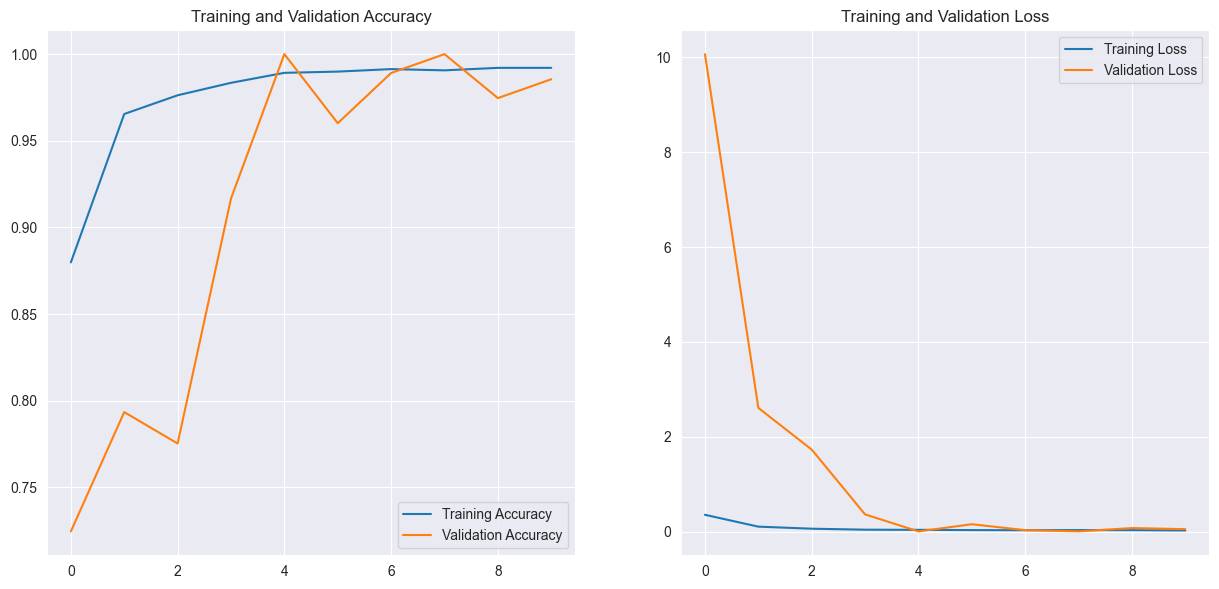

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
predictions = model.predict(x_test)
pred=np.argmax(predictions,axis=1)
pred = pred.reshape(1,-1)[0]
print(classification_report(y_test,pred, target_names = ['benign(Class 0)','malignant (Class 1)']))

13/13 [==============================] - 59s 3s/step
                     precision    recall  f1-score   support

    benign(Class 0)       0.99      0.95      0.97       242
malignant (Class 1)       0.93      0.99      0.96       170

           accuracy                           0.97       412
          macro avg       0.96      0.97      0.97       412
       weighted avg       0.97      0.97      0.97       412



In [15]:
accuracy = model.evaluate(x_test, y_test, batch_size=32)[1]
print("Accuracy:", accuracy)


13/13 [==============================] - 43s 3s/step - loss: 0.2854 - accuracy: 0.9660
Accuracy: 0.9660193920135498


In [16]:


image_path = "E:/Final Project/new/validation/benign/benign (350).png"


image = cv2.imread(image_path)
resized_image = cv2.resize(image, (img_size, img_size))
normalized_image = resized_image / 255.0  


input_image = np.expand_dims(normalized_image, axis=0)


predictions = model.predict(input_image)
predicted_class = np.argmax(predictions, axis=1)


if predicted_class == 0:
    print("The image is classified as benign.")
else:
    print("The image is classified as malignant.")


1/1 [==============================] - 1s 871ms/step
The image is classified as benign.


In [19]:
model.save("resnet101.h5")

E:\Final Project\my_venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
import pickle